<a href="https://colab.research.google.com/github/dev-hamiltonneto/Projeto-COVID-19-/blob/main/Projeto_Covid_19_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
#Base principal
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235693 entries, 0 to 235692
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    235693 non-null  object 
 1   continent                                   222396 non-null  object 
 2   location                                    235693 non-null  object 
 3   date                                        235693 non-null  object 
 4   total_cases                                 222465 non-null  float64
 5   new_cases                                   222213 non-null  float64
 6   new_cases_smoothed                          221014 non-null  float64
 7   total_deaths                                203169 non-null  float64
 8   new_deaths                                  203101 non-null  float64
 9   new_deaths_smoothed                         201921 non-null  float64
 

In [ ]:
df_br = df.loc[:, ['date', 'total_cases', 'new_cases', 'new_cases_smoothed','total_cases_per_million',
                   'new_cases_per_million', 'new_cases_smoothed_per_million', 
                   'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred','new_vaccinations_smoothed',
                   'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                   'icu_patients', 'icu_patients_per_million',
                   'hosp_patients', 'hosp_patients_per_million']].loc[df.location == 'Brazil']

In [ ]:
# verificando colunas vazias
faltantes = df_br.isnull().sum()
display(df_br.shape)
display(faltantes)

(996, 18)

date                                     0
total_cases                              0
new_cases                                3
new_cases_smoothed                       8
total_cases_per_million                  0
new_cases_per_million                    3
new_cases_smoothed_per_million           8
total_vaccinations                     396
people_vaccinated                      400
people_fully_vaccinated                416
total_vaccinations_per_hundred         396
new_vaccinations_smoothed              328
people_vaccinated_per_hundred          400
people_fully_vaccinated_per_hundred    416
icu_patients                           996
icu_patients_per_million               996
hosp_patients                          996
hosp_patients_per_million              996
dtype: int64

In [ ]:
# retirando colunas vazias
df_br1 = df_br.copy()

df_br.drop('icu_patients', axis=1, inplace=True)
df_br.drop('icu_patients_per_million', axis=1, inplace=True)
df_br.drop('hosp_patients', axis=1, inplace=True)
df_br.drop('hosp_patients_per_million', axis=1, inplace=True)
display(df_br)


,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,new_vaccinations_smoothed,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
28757,2020-02-26,1.0,1.0,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28758,2020-02-27,1.0,0.0,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28759,2020-02-28,1.0,0.0,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28760,2020-02-29,2.0,1.0,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28761,2020-03-01,2.0,0.0,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29748,2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,NaN,NaN,NaN,NaN,2041.0,NaN,NaN
29749,2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,2205.0,87.04,80.05
29750,2022-11-15,34908198.0,0.0,7529.429,162127.304,0.000,34.970,NaN,NaN,NaN,NaN,24749.0,NaN,NaN
29751,2022-11-16,34938073.0,29875.0,11797.286,162266.056,138.751,54.791,473450995.0,187678650.0,172674382.0,219.89,47292.0,87.17,80.20


In [ ]:
inicio_vac = df_br['people_vaccinated'].first_valid_index()
inicio_vac


29083

In [ ]:
df_br.tail()

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,new_vaccinations_smoothed,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
29748,2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,NaN,NaN,NaN,NaN,2041.0,NaN,NaN
29749,2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,2205.0,87.04,80.05
29750,2022-11-15,34908198.0,0.0,7529.429,162127.304,0.000,34.970,NaN,NaN,NaN,NaN,24749.0,NaN,NaN
29751,2022-11-16,34938073.0,29875.0,11797.286,162266.056,138.751,54.791,473450995.0,187678650.0,172674382.0,219.89,47292.0,87.17,80.20
29752,2022-11-17,34971043.0,32970.0,11638.143,162419.181,153.126,54.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 28757 to 29752
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 996 non-null    object 
 1   total_cases                          996 non-null    float64
 2   new_cases                            993 non-null    float64
 3   new_cases_smoothed                   988 non-null    float64
 4   total_cases_per_million              996 non-null    float64
 5   new_cases_per_million                993 non-null    float64
 6   new_cases_smoothed_per_million       988 non-null    float64
 7   total_vaccinations                   600 non-null    float64
 8   people_vaccinated                    596 non-null    float64
 9   people_fully_vaccinated              580 non-null    float64
 10  total_vaccinations_per_hundred       600 non-null    float64
 11  new_vaccinations_smoothed 

In [ ]:
#preenchendo os valores vazios com as resultado apresentado no index anterior
#foi escolhida essa forma de preenchimento, pois por ser média, o valor que estaria mais próximo seria ao do dia anterior
df_br['total_vaccinations'].fillna(method='ffill', inplace = True)
df_br['people_vaccinated'].fillna(method='ffill', inplace = True)
df_br['people_fully_vaccinated'].fillna(method='ffill', inplace = True)
df_br['total_vaccinations_per_hundred'].fillna(method='ffill', inplace = True)
df_br['people_vaccinated_per_hundred'].fillna(method='ffill', inplace = True)
df_br['people_fully_vaccinated_per_hundred'].fillna(method='ffill', inplace = True)
df_br['new_vaccinations_smoothed'].fillna(method='ffill', inplace = True)

In [ ]:
#o que não foi preenchido inicialmente foi colocado 0
df_br['total_vaccinations'].fillna(value = 0, inplace = True)
df_br['people_vaccinated'].fillna(value = 0, inplace = True)
df_br['people_fully_vaccinated'].fillna(value = 0, inplace = True)
df_br['total_vaccinations_per_hundred'].fillna(value = 0, inplace = True)
df_br['people_vaccinated_per_hundred'].fillna(value = 0, inplace = True)
df_br['people_fully_vaccinated_per_hundred'].fillna(value = 0, inplace = True)
df_br['new_vaccinations_smoothed'].fillna(value = 0, inplace = True)

In [ ]:
df_br.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 28757 to 29752
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 996 non-null    object 
 1   total_cases                          996 non-null    float64
 2   new_cases                            993 non-null    float64
 3   new_cases_smoothed                   988 non-null    float64
 4   total_cases_per_million              996 non-null    float64
 5   new_cases_per_million                993 non-null    float64
 6   new_cases_smoothed_per_million       988 non-null    float64
 7   total_vaccinations                   996 non-null    float64
 8   people_vaccinated                    996 non-null    float64
 9   people_fully_vaccinated              996 non-null    float64
 10  total_vaccinations_per_hundred       996 non-null    float64
 11  new_vaccinations_smoothed 

In [ ]:
df_casos = df_br[['date', 'total_cases', 'new_cases', 'new_cases_smoothed','total_cases_per_million',
                   'new_cases_per_million', 'new_cases_smoothed_per_million', 
                   'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred',
                   'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred','new_vaccinations_smoothed']]
df_casos.head(10)

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
28757,2020-02-26,1.0,1.0,NaN,0.005,0.005,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28758,2020-02-27,1.0,0.0,NaN,0.005,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28759,2020-02-28,1.0,0.0,NaN,0.005,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28760,2020-02-29,2.0,1.0,NaN,0.009,0.005,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28761,2020-03-01,2.0,0.0,NaN,0.009,0.000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28762,2020-03-02,2.0,0.0,0.286,0.009,0.000,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28763,2020-03-03,2.0,0.0,0.286,0.009,0.000,0.001,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28764,2020-03-04,4.0,2.0,0.429,0.019,0.009,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28765,2020-03-05,4.0,0.0,0.429,0.019,0.000,0.002,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28766,2020-03-06,13.0,9.0,1.714,0.060,0.042,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_casos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 28757 to 29752
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 996 non-null    object 
 1   total_cases                          996 non-null    float64
 2   new_cases                            993 non-null    float64
 3   new_cases_smoothed                   988 non-null    float64
 4   total_cases_per_million              996 non-null    float64
 5   new_cases_per_million                993 non-null    float64
 6   new_cases_smoothed_per_million       988 non-null    float64
 7   total_vaccinations                   996 non-null    float64
 8   people_vaccinated                    996 non-null    float64
 9   people_fully_vaccinated              996 non-null    float64
 10  total_vaccinations_per_hundred       996 non-null    float64
 11  people_vaccinated_per_hund

In [ ]:
#Assim como casos e vacinados. Será feito dois tipos de preenchimento para: new_cases, new_cases_smoothed, new_cases_per_million e new_cases_smoothed_per_million
#O primeiro, ffill para valores NaN no meio da tabela serem preenchidos com os anteriores e após isso, preencher com 0 o que ainda está nulo, imaginando que sejam as datas iniciais
df_casos['new_cases'].fillna(method='ffill', inplace = True)
df_casos['new_cases_smoothed'].fillna(method='ffill', inplace = True)
df_casos['new_cases_per_million'].fillna(method='ffill', inplace = True)
df_casos['new_cases_smoothed_per_million'].fillna(method='ffill', inplace = True)

#preenchendo valores por zero
df_casos['new_cases'].fillna(value = 0, inplace = True)
df_casos['new_cases_smoothed'].fillna(value = 0, inplace = True)
df_casos['new_cases_per_million'].fillna(value = 0, inplace = True)
df_casos['new_cases_smoothed_per_million'].fillna(value = 0, inplace = True)

In [ ]:
df_casos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 28757 to 29752
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 996 non-null    object 
 1   total_cases                          996 non-null    float64
 2   new_cases                            996 non-null    float64
 3   new_cases_smoothed                   996 non-null    float64
 4   total_cases_per_million              996 non-null    float64
 5   new_cases_per_million                996 non-null    float64
 6   new_cases_smoothed_per_million       996 non-null    float64
 7   total_vaccinations                   996 non-null    float64
 8   people_vaccinated                    996 non-null    float64
 9   people_fully_vaccinated              996 non-null    float64
 10  total_vaccinations_per_hundred       996 non-null    float64
 11  people_vaccinated_per_hund

In [ ]:
df_casos.head(5)

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
28757,2020-02-26,1.0,1.0,0.0,0.005,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28758,2020-02-27,1.0,0.0,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28759,2020-02-28,1.0,0.0,0.0,0.005,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28760,2020-02-29,2.0,1.0,0.0,0.009,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28761,2020-03-01,2.0,0.0,0.0,0.009,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_casos.tail(5)

,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
29748,2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,473127683.0,187399523.0,172351070.0,219.74,87.04,80.05,2041.0
29749,2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,87.04,80.05,2205.0
29750,2022-11-15,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,87.04,80.05,24749.0
29751,2022-11-16,34938073.0,29875.0,11797.286,162266.056,138.751,54.791,473450995.0,187678650.0,172674382.0,219.89,87.17,80.20,47292.0
29752,2022-11-17,34971043.0,32970.0,11638.143,162419.181,153.126,54.052,473450995.0,187678650.0,172674382.0,219.89,87.17,80.20,47292.0


In [ ]:
#df para casos antes da vacina
df_casos_pre = df_casos.loc[:inicio_vac,:].set_index('date')

In [ ]:
#df para casos depois da vacina
df_casos_pos = df_casos.loc[inicio_vac:,:].set_index('date')
display(df_casos_pos)

,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed
date,,,,,,,,,,,,,
2021-01-17,8492403.0,31416.0,54612.143,39442.036,145.908,253.640,112.0,112.0,0.0,0.00,0.00,0.00,0.0
2021-01-18,8521336.0,28933.0,54353.000,39576.412,134.376,252.437,1109.0,1109.0,0.0,0.00,0.00,0.00,997.0
2021-01-19,8583485.0,62149.0,54028.000,39865.056,288.644,250.927,13527.0,13527.0,0.0,0.01,0.01,0.00,6708.0
2021-01-20,8647962.0,64477.0,54692.286,40164.513,299.456,254.012,105824.0,105824.0,0.0,0.05,0.05,0.00,35237.0
2021-01-21,8706912.0,58950.0,53352.429,40438.300,273.787,247.790,193699.0,193699.0,0.0,0.09,0.09,0.00,48397.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-13,34908198.0,0.0,8447.857,162127.304,0.000,39.235,473127683.0,187399523.0,172351070.0,219.74,87.04,80.05,2041.0
2022-11-14,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,87.04,80.05,2205.0
2022-11-15,34908198.0,0.0,7529.429,162127.304,0.000,34.970,473133683.0,187399523.0,172357070.0,219.74,87.04,80.05,24749.0


In [ ]:
df_casos_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327 entries, 2020-02-26 to 2021-01-17
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   total_cases                          327 non-null    float64
 1   new_cases                            327 non-null    float64
 2   new_cases_smoothed                   327 non-null    float64
 3   total_cases_per_million              327 non-null    float64
 4   new_cases_per_million                327 non-null    float64
 5   new_cases_smoothed_per_million       327 non-null    float64
 6   total_vaccinations                   327 non-null    float64
 7   people_vaccinated                    327 non-null    float64
 8   people_fully_vaccinated              327 non-null    float64
 9   total_vaccinations_per_hundred       327 non-null    float64
 10  people_vaccinated_per_hundred        327 non-null    float64
 11  people_fully_vaccinat

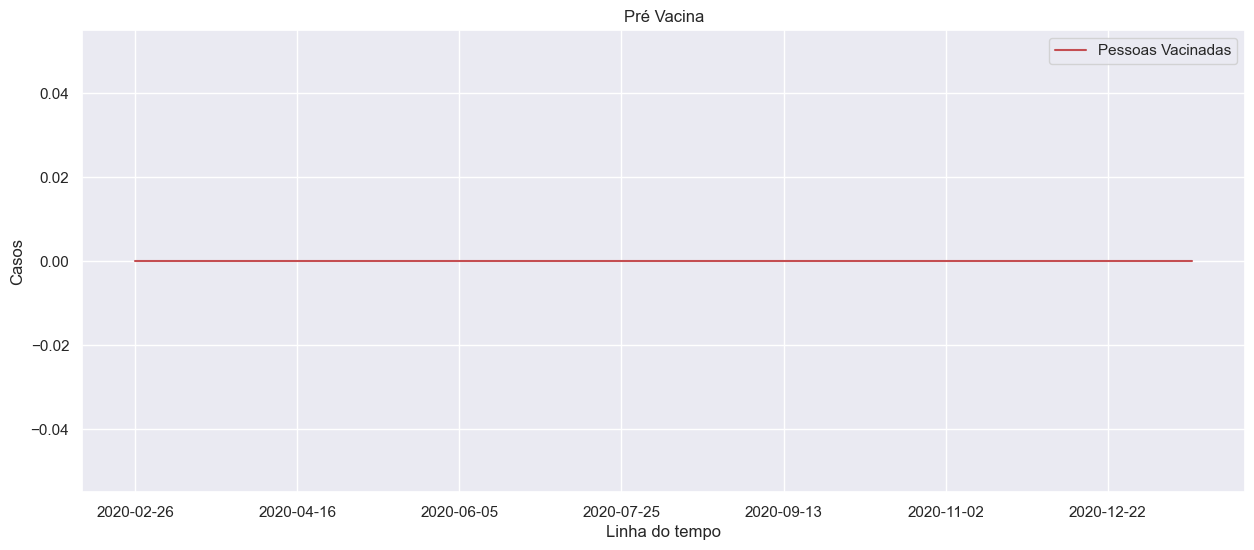

In [ ]:
#veriricar se antes da vacina está de fato zerado
sns.set()

df_casos_pre.people_fully_vaccinated_per_hundred.plot(figsize=(15,6),label = 'Pessoas Vacinadas',
color= 'r', xlabel = 'Linha do tempo', ylabel = 'Casos')
plt.title('Pré Vacina')
plt.legend()

plt.show()

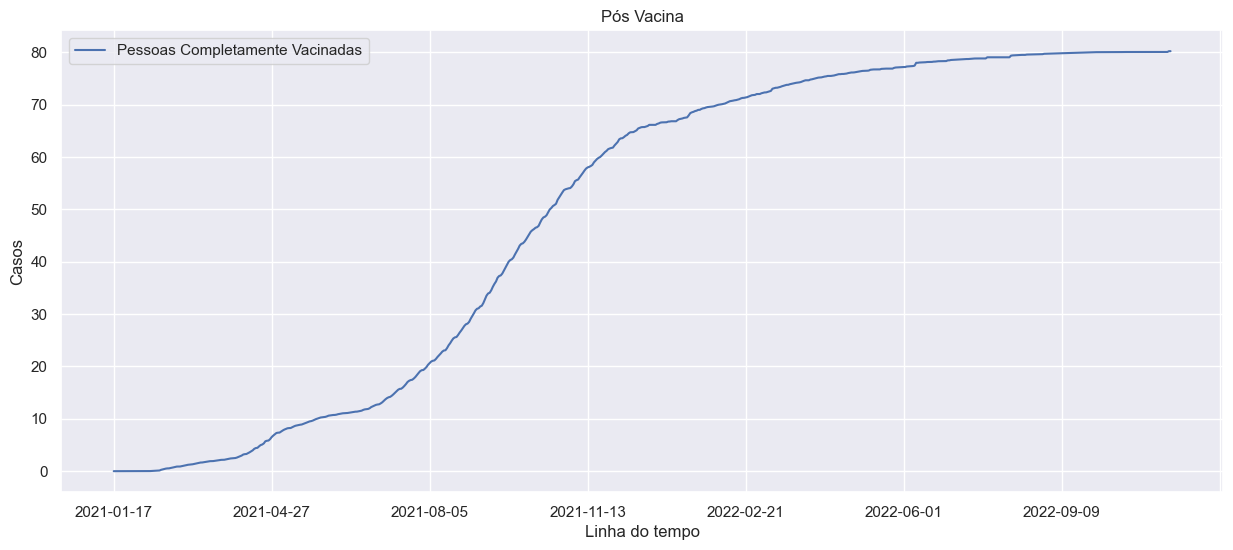

In [ ]:
#verificar as pessoas completamente vacinadas ao longo do tempo
df_casos_pos.people_fully_vaccinated_per_hundred.plot(figsize=(15,6),
label = 'Pessoas Completamente Vacinadas', xlabel = 'Linha do tempo', ylabel = 'Casos')
plt.title('Pós Vacina')
plt.legend()

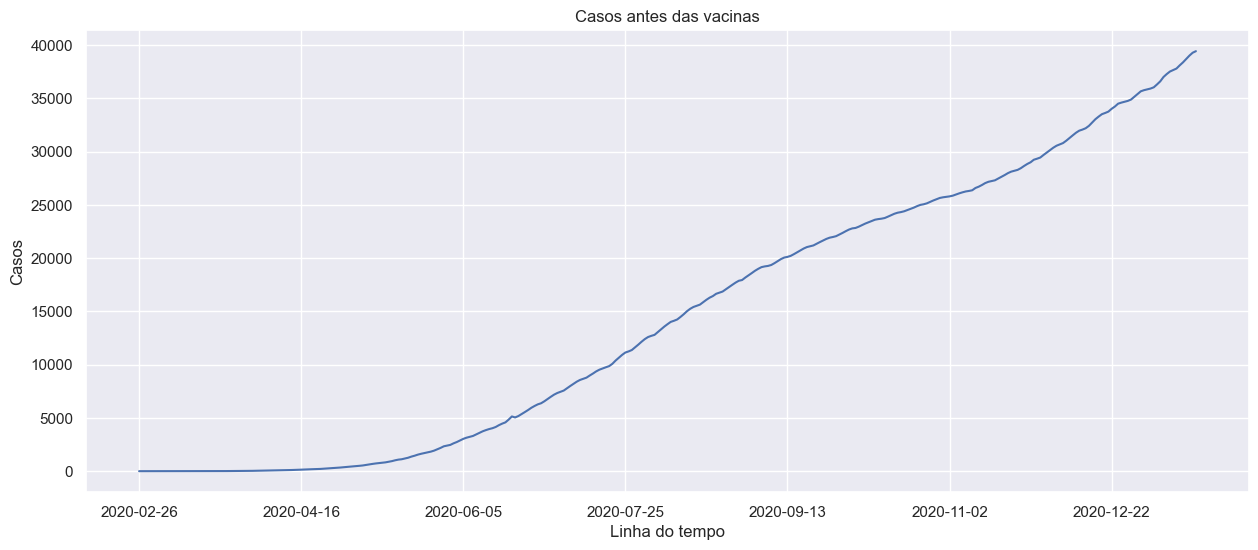

In [ ]:
#verificar comportamento da curva de casos antes da vacina
sns.set()
df_casos_pre.total_cases_per_million.plot(figsize=(15,6), xlabel = 'Linha do tempo', ylabel = 'Casos')
plt.title('Casos antes das vacinas')
plt.show()

Text(0.5, 1.0, 'Casos após das vacinas')

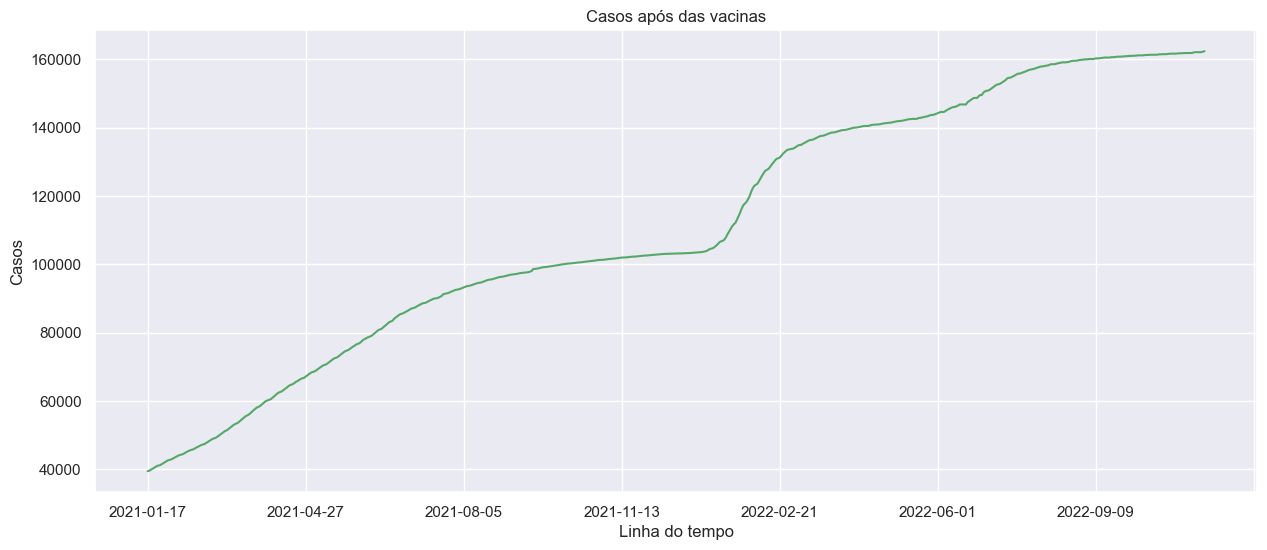

In [ ]:
#verificar comportamento da curva de casos depois da vacina
df_casos_pos.total_cases_per_million.plot(figsize=(15,6), xlabel = 'Linha do tempo', ylabel = 'Casos', color = 'g')
plt.title('Casos após das vacinas')

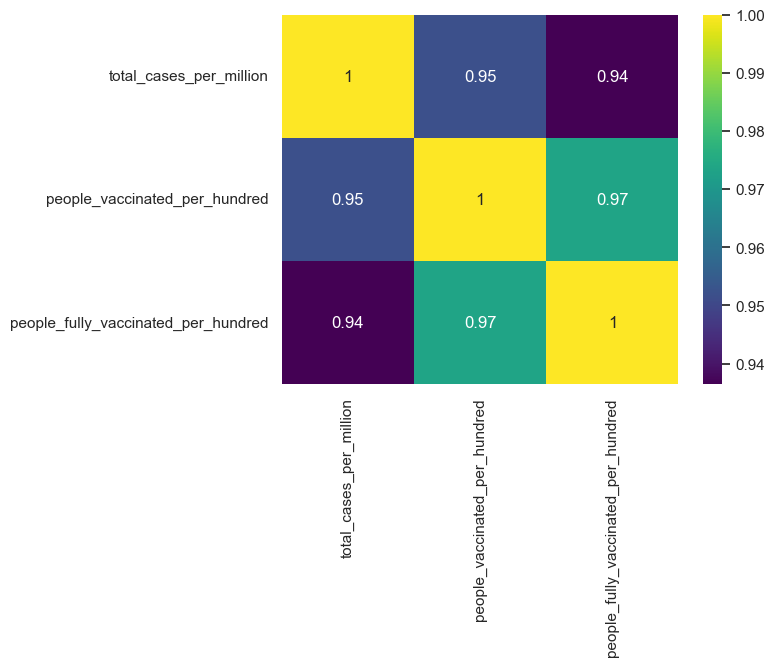

In [ ]:
sns.heatmap(df_casos.loc[:,('total_cases_per_million', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred')].corr(), cmap='viridis', annot=True,);

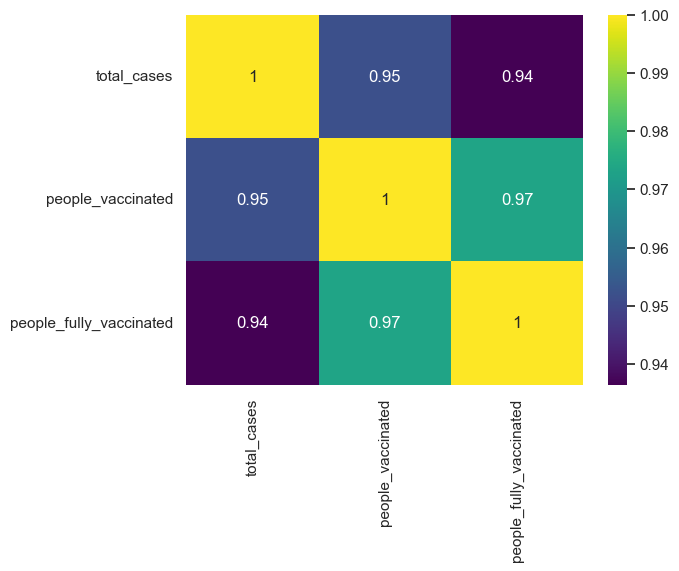

In [ ]:
sns.heatmap(df_casos.loc[:,('total_cases', 'people_vaccinated', 'people_fully_vaccinated')].corr(), cmap='viridis', annot=True,);

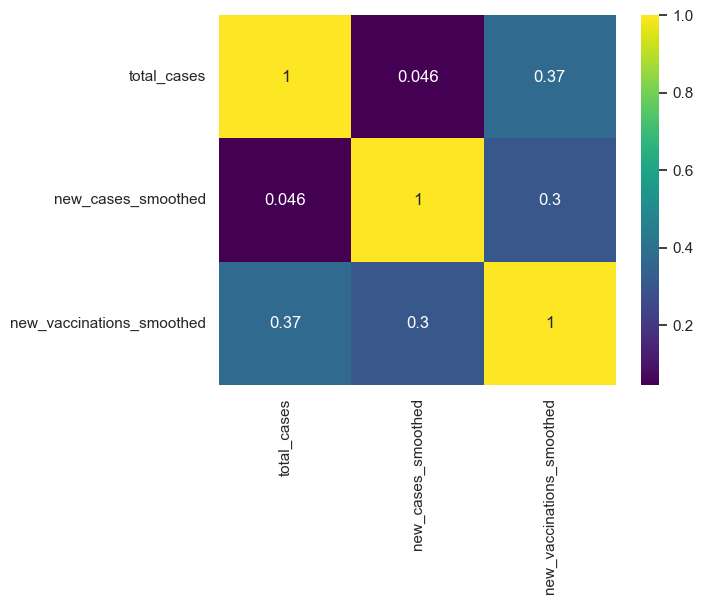

In [ ]:
sns.heatmap(df_casos.loc[:,('total_cases', 'new_cases_smoothed', 'new_vaccinations_smoothed')].corr(), cmap='viridis', annot=True,);

#Preparando os dados

In [ ]:
df_1 = df.loc[:, ['location', 'date', 'total_cases']].loc[df.location == 'Brazil']
df_2 = df.loc[:, ['location', 'date', 'total_deaths']].loc[df.location == 'Brazil'].loc[df.total_deaths.notnull()]

In [ ]:
total_casos = df_1.loc[:, ['total_cases']]
total_mortes = df_2.loc[:, ['total_deaths']]

#Modelo Matemático

In [ ]:
# Função Arco tangente
def modelo(x, a, b, c, d):
  argumento = [b*(x-c)]
  valor = a*np.arctan(argumento) + d
  return valor[0]

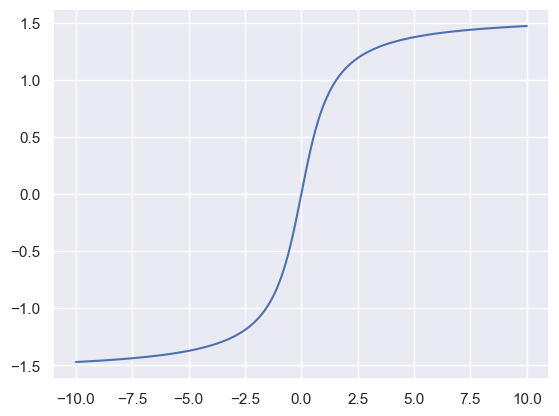

In [ ]:
#Gráfico do Modelo
x = np.linspace(-10, 10, 1000)
y = modelo(x, 1, 1, 0, 0)
plt.plot(x, y)
plt.show()

#Entendendo os parâmetros da função

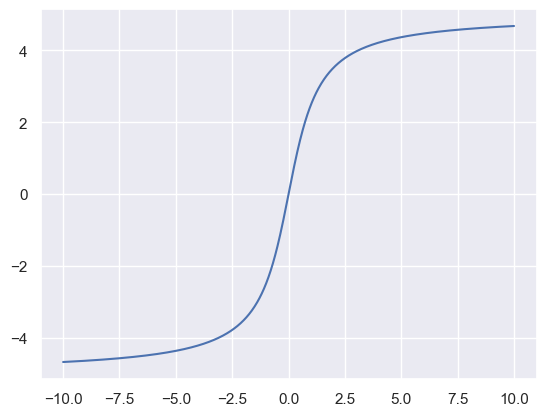

In [ ]:
#Parâmetro a: altura da função sobre pi
x_a = np.linspace(-10, 10, 1000)
p_a = 10/np.pi
y_a = modelo(x_a, p_a, 1, 0, 0)
plt.plot(x_a, y_a)
plt.show()

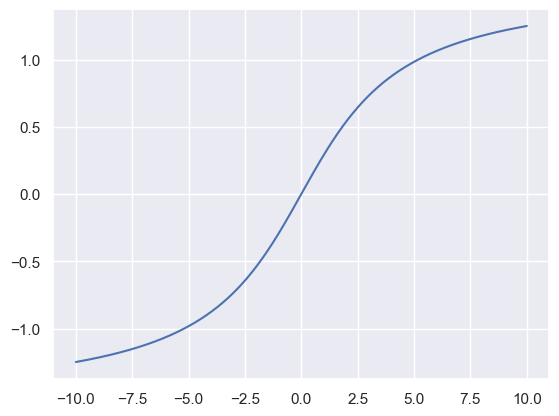

In [ ]:
#Parâmetro b: derivada da função no ponto de inflecção dividido pelo parâmetro a
x_b = np.linspace(-10, 10, 1000)
y_b = modelo(x_b, 1, 0.3, 0, 0)
plt.plot(x_b, y_b)
plt.show()

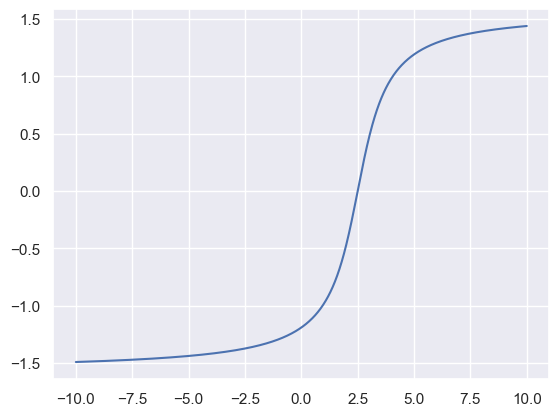

In [ ]:
#Parâmetro c: absissa do ponto de inflecção
x_c = np.linspace(-10, 10, 1000)
y_c = modelo(x_c, 1, 1, 2.5, 0)
plt.plot(x_c, y_c)
plt.show()

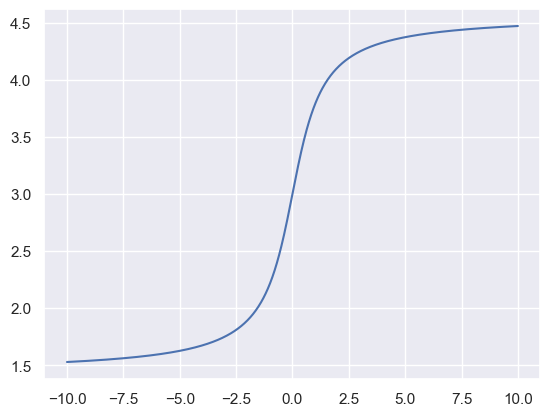

In [ ]:
#Parâmetro d: ordenada do ponto de inflecção
x_d = np.linspace(-10, 10, 1000)
y_d = modelo(x, 1, 1, 0, 3)
plt.plot(x_d, y_d)
plt.show()

In [ ]:
# Função para extrair os valores dos indices e dos parametros
def extrair(data, column):
  indice_inicial = int(data.first_valid_index())
  indice_final = int(data.last_valid_index())
  parametro_a = (data.loc[indice_final,column]-data.loc[indice_inicial,column])/np.pi
  parametro_b = ((data.loc[indice_final,column]-data.loc[indice_inicial,column])/(indice_final - indice_inicial))/parametro_a
  parametro_c = int((indice_inicial+indice_final)/2)
  parametro_d = int(data.loc[parametro_c,column]/2)
  return indice_inicial, indice_final, parametro_a, parametro_b, parametro_c, parametro_d

#Método de Otimização - Mínimos Quadrados

In [ ]:
# Conjunto de valores experimentais 
x_m = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_m = np.array([0.9, 2.3, 3.2, 3.8, 5, 6.2, 7, 7.7, 9.1, 10])

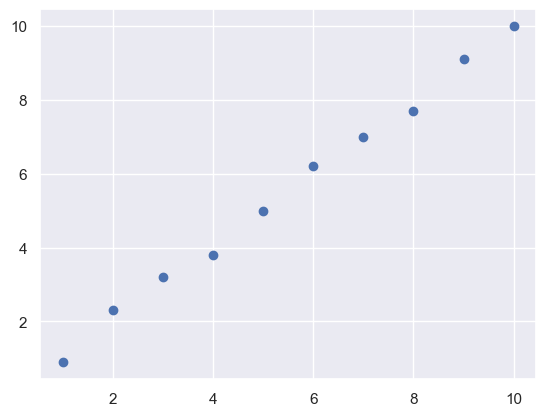

In [ ]:
#Gráfico dos valores experimentais
plt.scatter(x_m, y_m)
plt.show()

In [ ]:
# Definindo o modelo
def afim(x, a, b):
  return a*x + b

In [ ]:
#Fit da curva: escolha dos parâmetros que minimizam o funcional quadrado da distância
popt_m, pcov_m = curve_fit(afim, x_m, y_m, p0=[2,1])

In [ ]:
#Parametros otimizados
popt_m

array([0.98666667, 0.09333333])

In [ ]:
#Matriz de covariância: Erro associado aos parâmetros otimizados
pcov_m

array([[ 0.00045657, -0.00251111],
       [-0.00251111,  0.01757776]])

<function matplotlib.pyplot.show(close=None, block=None)>

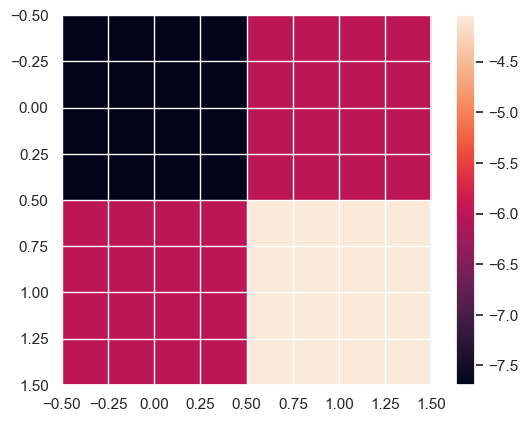

In [ ]:
#Gráfico do erro na matriz de covariância em escala logaritmica
plt.imshow(np.log(abs(pcov_m)))
plt.colorbar()
plt.show

In [ ]:
#Preparar o gráfico da função do modelo
a_m, b_m = popt_m
x_model_m = np.linspace(min(x_m), max(x_m), 100)
y_model_m = afim(x_model_m, a_m, b_m)

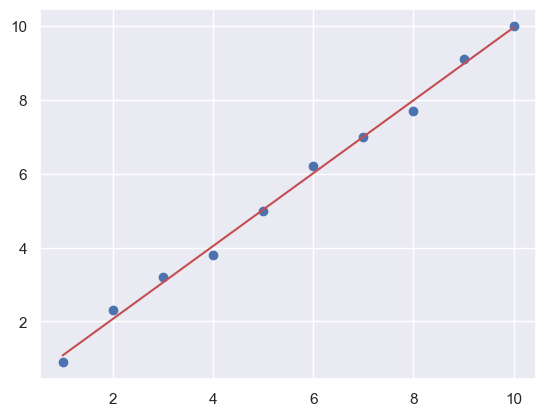

In [ ]:
#Gráfico Comparando os valores retirados dos dados contra os valores do modelo
plt.scatter(x_m, y_m)
plt.plot(x_model_m, y_model_m, 'r')
plt.show()

#Número de Casos Totais

In [ ]:
#Extração dos parâmetros de trabalho
in_i_casos, in_f_casos, a_casos, b_casos, c_casos, d_casos = extrair(total_casos, 'total_cases')

In [ ]:
# Número de casos
x_numero_de_casos = [x for x in range(in_i_casos,in_f_casos+1)]
y_numero_de_casos = [total_casos.loc[i,'total_cases'] for i in range(in_i_casos,in_f_casos+1)]

In [ ]:
# Método - Mínimos quadrados
popt_numero_de_casos, pcov_numero_de_casos = curve_fit(modelo, x_numero_de_casos, y_numero_de_casos, p0=[a_casos, b_casos, c_casos, d_casos])

In [ ]:
#Parâmetros otimizados
popt_numero_de_casos

array([2.32363900e+07, 2.08424365e-03, 2.92539760e+04, 1.71618330e+07])

In [ ]:
#A matriz de covariância
pcov_numero_de_casos

array([[ 2.55617418e+11, -3.02600115e+01, -8.46110256e+03,
        -3.56495015e+08],
       [-3.02600115e+01,  3.63812874e-09,  9.30292939e-07,
         3.91961904e-02],
       [-8.46110256e+03,  9.30292939e-07,  1.55464918e+01,
         5.83232023e+05],
       [-3.56495015e+08,  3.91961904e-02,  5.83232023e+05,
         2.28997831e+10]])

<function matplotlib.pyplot.show(close=None, block=None)>

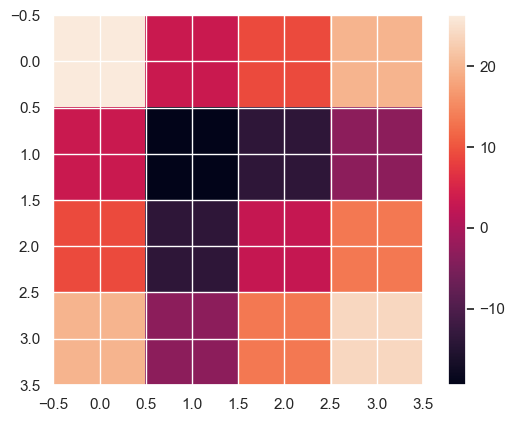

In [ ]:
#Gráfico do erro na matriz de covariância
plt.imshow(np.log(abs(pcov_numero_de_casos)))
plt.colorbar()
plt.show

In [ ]:
#Preparar o gráfico
a_opt_casos, b_opt_casos, c_opt_casos, d_opt_casos = popt_numero_de_casos
x_model_casos = np.linspace(min(x_numero_de_casos), max(x_numero_de_casos), 1000)
y_model_casos = modelo(x_model_casos, a_opt_casos, b_opt_casos, c_opt_casos, d_opt_casos)

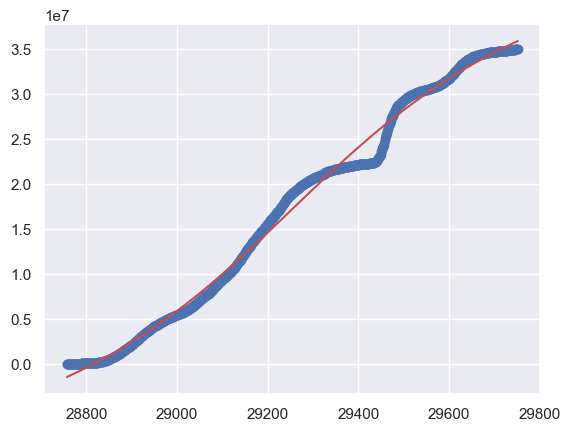

In [ ]:
#Gráfico Comparando os valores retirados dos dados contra os valores do modelo
plt.scatter(x_numero_de_casos, y_numero_de_casos)
plt.plot(x_model_casos, y_model_casos, 'r')
plt.show()

#Número de Mortes

In [ ]:
#Extração dos parâmetros de trabalho
in_i_mortes, in_f_mortes, a_mortes, b_mortes, c_mortes, d_mortes = extrair(total_mortes, 'total_deaths')

In [ ]:
# Número de mortes
x_numero_de_mortes = [x for x in range(in_i_mortes,in_f_mortes+1)]
y_numero_de_mortes = [total_mortes.loc[i,'total_deaths'] for i in range(in_i_mortes,in_f_mortes+1)]

In [ ]:
# Método - Mínimos quadrados
popt_numero_de_mortes, pcov_numero_de_mortes = curve_fit(modelo, x_numero_de_mortes, y_numero_de_mortes, p0=[a_mortes, b_mortes, c_mortes, d_mortes])

In [ ]:
#Parâmetros otimizados
popt_numero_de_mortes

array([2.55403003e+05, 7.51154851e-03, 2.91556312e+04, 3.46372217e+05])

In [ ]:
#A matriz de covariância
pcov_numero_de_mortes

array([[ 2.27229073e+06, -1.54372303e-01, -6.01847103e+02,
        -7.65591241e+05],
       [-1.54372303e-01,  1.26537780e-08,  3.39171851e-05,
         4.30783342e-02],
       [-6.01847103e+02,  3.39171851e-05,  1.22255718e+00,
         9.35373413e+02],
       [-7.65591241e+05,  4.30783342e-02,  9.35373413e+02,
         1.10710809e+06]])

<function matplotlib.pyplot.show(close=None, block=None)>

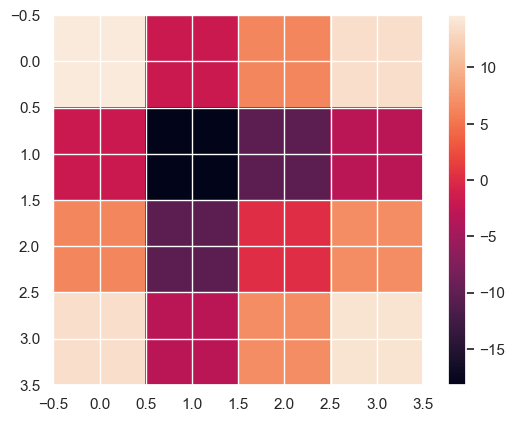

In [ ]:
#Gráfico do erro na matriz de covariância
plt.imshow(np.log(abs(pcov_numero_de_mortes)))
plt.colorbar()
plt.show

In [ ]:
#Preparar o gráfico
a_opt_mortes, b_opt_mortes, c_opt_mortes, d_opt_mortes = popt_numero_de_mortes
x_model_mortes = np.linspace(min(x_numero_de_mortes), max(x_numero_de_mortes), 1000)
y_model_mortes = modelo(x_model_mortes, a_opt_mortes, b_opt_mortes, c_opt_mortes, d_opt_mortes)

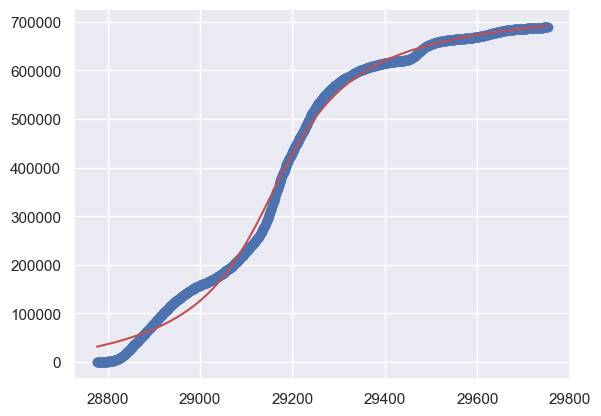

In [ ]:
#Gráfico Comparando os valores retirados dos dados contra os valores do modelo
plt.scatter(x_numero_de_mortes, y_numero_de_mortes)
plt.plot(x_model_mortes, y_model_mortes, 'r')
plt.show()